In [29]:
# manage data and fit
import pandas as pd
import numpy as np

# first part with least squares
from scipy.optimize import curve_fit

# second part about ODR
from scipy.odr import ODR, Model, Data, RealData

# style and notebook integration of the plots
import seaborn as sns
%matplotlib inline 
sns.set(style="whitegrid", font_scale=2)

from math import sqrt,pi,exp

In [4]:
df = pd.read_csv(
    "2018-11 JMT Li-rich NMC Pristine-csp-22112018.TXT", 
    sep="\t",
    skiprows=3,
)

In [5]:
df

,KE_LiM3p_s MRSof/23,BE_LiM3p_s MRSof/23,CPS_LiM3p_s MRSof/23,Mn 3p_1_LiM3p_s MRSof/23,Mn 3p_2_LiM3p_s MRSof/23,Li 1s_3_LiM3p_s MRSof/23,Co 3p_4_LiM3p_s MRSof/23,Co 3p + Na2s_5_LiM3p_s MRSof/23,Ni 3p_6_LiM3p_s MRSof/23,Ni 3p_7_LiM3p_s MRSof/23,Ni 3p_8_LiM3p_s MRSof/23,Mn 3s_9_LiM3p_s MRSof/23,Mn 3s_10_LiM3p_s MRSof/23,Li 1s7_11_LiM3p_s MRSof/23,Ni 3p_12_LiM3p_s MRSof/23,Background_LiM3p_s MRSof/23,Envelope_LiM3p_s MRSof/23
0,1390.79,95.9,175.30,175.30,175.3000,175.30,175.30,175.30,175.30,175.30,175.30,175.30,175.318,175.30,175.30,175.30,175.3180
1,1390.89,95.8,175.90,175.90,175.9000,175.90,175.90,175.90,175.90,175.90,175.90,175.90,175.922,175.90,175.90,175.90,175.9220
2,1390.99,95.7,180.85,180.85,180.8500,180.85,180.85,180.85,180.85,180.85,180.85,180.85,180.876,180.85,180.85,180.85,180.8760
3,1391.09,95.6,180.75,180.75,180.7500,180.75,180.75,180.75,180.75,180.75,180.75,180.75,180.781,180.75,180.75,180.75,180.7810
4,1391.19,95.5,178.35,178.35,178.3500,178.35,178.35,178.35,178.35,178.35,178.35,178.35,178.388,178.35,178.35,178.35,178.3880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1443.39,43.3,60.40,60.40,60.4040,60.40,60.40,60.40,60.40,60.40,60.40,60.40,60.400,60.40,60.40,60.40,60.4040
527,1443.49,43.2,61.20,61.20,61.2032,61.20,61.20,61.20,61.20,61.20,61.20,61.20,61.200,61.20,61.20,61.20,61.2032
528,1443.59,43.1,62.65,62.65,62.6525,62.65,62.65,62.65,62.65,62.65,62.65,62.65,62.650,62.65,62.65,62.65,62.6525
529,1443.69,43.0,63.25,63.25,63.2520,63.25,63.25,63.25,63.25,63.25,63.25,63.25,63.250,63.25,63.25,63.25,63.2520


In [7]:
ddf = df.set_index("BE_LiM3p_s MRSof/23")
ddf

,KE_LiM3p_s MRSof/23,CPS_LiM3p_s MRSof/23,Mn 3p_1_LiM3p_s MRSof/23,Mn 3p_2_LiM3p_s MRSof/23,Li 1s_3_LiM3p_s MRSof/23,Co 3p_4_LiM3p_s MRSof/23,Co 3p + Na2s_5_LiM3p_s MRSof/23,Ni 3p_6_LiM3p_s MRSof/23,Ni 3p_7_LiM3p_s MRSof/23,Ni 3p_8_LiM3p_s MRSof/23,Mn 3s_9_LiM3p_s MRSof/23,Mn 3s_10_LiM3p_s MRSof/23,Li 1s7_11_LiM3p_s MRSof/23,Ni 3p_12_LiM3p_s MRSof/23,Background_LiM3p_s MRSof/23,Envelope_LiM3p_s MRSof/23
BE_LiM3p_s MRSof/23,,,,,,,,,,,,,,,,
95.9,1390.79,175.30,175.30,175.3000,175.30,175.30,175.30,175.30,175.30,175.30,175.30,175.318,175.30,175.30,175.30,175.3180
95.8,1390.89,175.90,175.90,175.9000,175.90,175.90,175.90,175.90,175.90,175.90,175.90,175.922,175.90,175.90,175.90,175.9220
95.7,1390.99,180.85,180.85,180.8500,180.85,180.85,180.85,180.85,180.85,180.85,180.85,180.876,180.85,180.85,180.85,180.8760
95.6,1391.09,180.75,180.75,180.7500,180.75,180.75,180.75,180.75,180.75,180.75,180.75,180.781,180.75,180.75,180.75,180.7810
95.5,1391.19,178.35,178.35,178.3500,178.35,178.35,178.35,178.35,178.35,178.35,178.35,178.388,178.35,178.35,178.35,178.3880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43.3,1443.39,60.40,60.40,60.4040,60.40,60.40,60.40,60.40,60.40,60.40,60.40,60.400,60.40,60.40,60.40,60.4040
43.2,1443.49,61.20,61.20,61.2032,61.20,61.20,61.20,61.20,61.20,61.20,61.20,61.200,61.20,61.20,61.20,61.2032
43.1,1443.59,62.65,62.65,62.6525,62.65,62.65,62.65,62.65,62.65,62.65,62.65,62.650,62.65,62.65,62.65,62.6525


In [12]:
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 10

<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

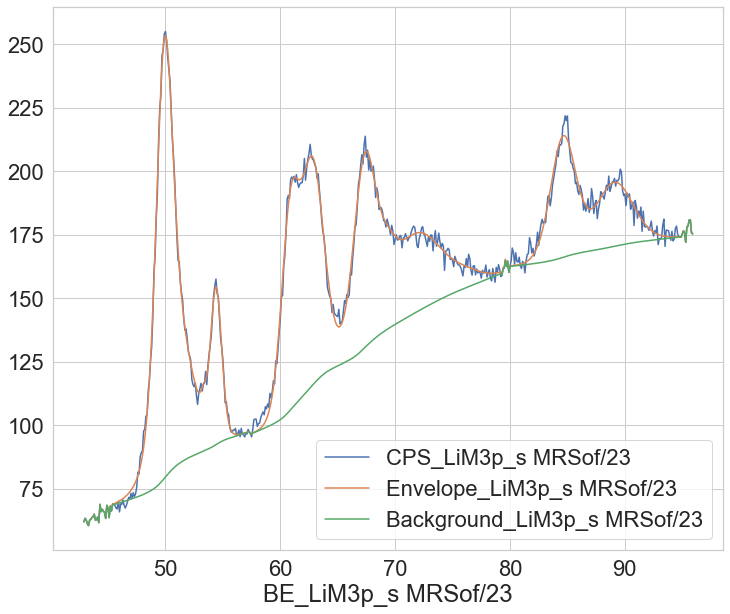

In [25]:
(ddf.iloc[:,[1,-1,-2]]).plot(figsize=(12, 10), legend=True
        )

<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

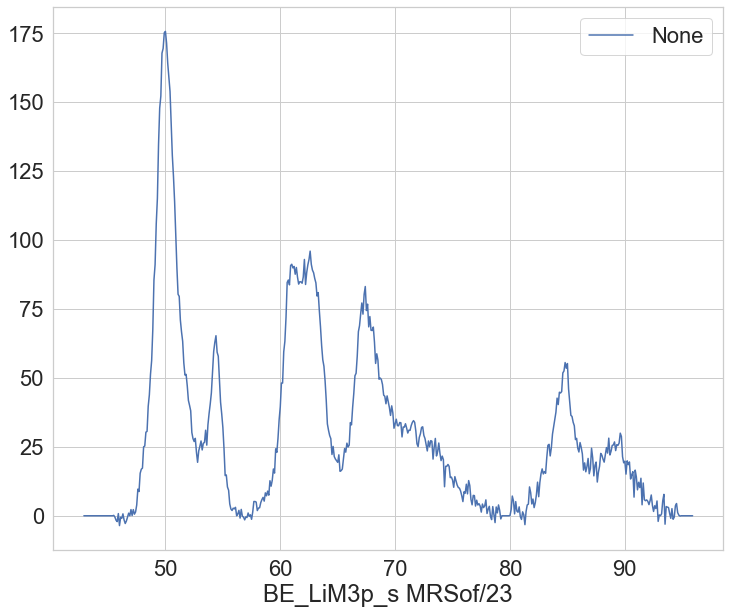

In [24]:
(ddf.iloc[:,1]- ddf.iloc[:,-2]).plot(figsize=(12, 10), legend=True
        )

In [26]:
ddf2=ddf.iloc[:,1]- ddf.iloc[:,-2]

In [30]:
def gaussienne(x,mu,sigma_carre):
    return (1/sqrt(2*pi*sigma_carre)*exp(-1/2*(x-mu)**2/sigma_carre))

In [4]:
df = pd.read_csv(
    "Amiens Lirich-NMC 02-Li-ric-pristine-26062014 Métaux3p-Li1s.TXT", 
    sep="\t",
    encoding = 'mbcs',
    skiprows=3,
)

In [5]:
df

,KE_Metaux3p-Li1s/15,BE_Metaux3p-Li1s/15,CPS_Metaux3p-Li1s/15,Mn 3p_1_Metaux3p-Li1s/15,Mn 3p_2_Metaux3p-Li1s/15,Li 1s_3_Metaux3p-Li1s/15,Co 3p_4_Metaux3p-Li1s/15,Co 3p_5_Metaux3p-Li1s/15,Ni 3p Ni2+_6_Metaux3p-Li1s/15,Ni 3p Ni2+_7_Metaux3p-Li1s/15,Ni 3p Ni2+_8_Metaux3p-Li1s/15,Li 1s_9_Metaux3p-Li1s/15,Background_Metaux3p-Li1s/15,Envelope_Metaux3p-Li1s/15
0,1409.26,77.4275,98.2906,98.2906,98.2906,98.2906,98.2906,98.2906,98.2906,98.2906,98.7879,98.2906,98.2906,98.7879
1,1409.36,77.3275,100.4270,100.4270,100.4270,100.4270,100.4270,100.4270,100.4270,100.4270,100.9730,100.4270,100.4270,100.9730
2,1409.46,77.2275,101.6670,101.6670,101.6670,101.6670,101.6670,101.6670,101.6670,101.6670,102.2640,101.6670,101.6670,102.2640
3,1409.56,77.1275,98.5897,100.5150,100.5150,100.5150,100.5150,100.5150,100.5150,100.5150,101.1670,100.5150,100.5150,101.1670
4,1409.66,77.0275,101.3250,100.4010,100.4010,100.4010,100.4010,100.4010,100.4010,100.4010,101.1140,100.4010,100.4010,101.1140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,1440.86,45.8275,44.4444,44.4458,44.4445,44.4444,44.4444,44.4444,44.4444,44.4444,44.4444,44.4444,44.4444,44.4458
317,1440.96,45.7275,45.5128,45.5136,45.5128,45.5128,45.5128,45.5128,45.5128,45.5128,45.5128,45.5128,45.5128,45.5136
318,1441.06,45.6275,43.5897,43.5902,43.5898,43.5897,43.5897,43.5897,43.5897,43.5897,43.5897,43.5897,43.5897,43.5902
319,1441.16,45.5275,42.8632,42.8635,42.8633,42.8632,42.8632,42.8632,42.8632,42.8632,42.8632,42.8632,42.8632,42.8635


In [6]:
df = pd.read_csv(
    "ANR Int 5V electrode reference LNM Metaux3p-Li1s.TXT", 
    sep="\t",
    encoding = 'mbcs',
    skiprows=3,
)

In [7]:
df

,KE_Ni3p-Li1s-Mn3p/24,BE_Ni3p-Li1s-Mn3p/24,CPS_Ni3p-Li1s-Mn3p/24,Mn 3p_1_Ni3p-Li1s-Mn3p/24,Mn 3p_2_Ni3p-Li1s-Mn3p/24,Mn 3p_3_Ni3p-Li1s-Mn3p/24,Li 1s_4_Ni3p-Li1s-Mn3p/24,Ni 3p_5_Ni3p-Li1s-Mn3p/24,Ni 3p_6_Ni3p-Li1s-Mn3p/24,Mn 3p_7_Ni3p-Li1s-Mn3p/24,Ni 3p_8_Ni3p-Li1s-Mn3p/24,Background_Ni3p-Li1s-Mn3p/24,Envelope_Ni3p-Li1s-Mn3p/24
0,1408.58,78.11,141.5280,141.5280,141.5280,141.5280,141.5280,141.5280,141.6100,141.5280,141.5280,141.5280,141.6100
1,1408.68,78.01,141.0420,141.0420,141.0420,141.0420,141.0420,141.0420,141.1370,141.0420,141.0420,141.0420,141.1370
2,1408.78,77.91,140.4860,140.4860,140.4860,140.4860,140.4860,140.4860,140.5960,140.4860,140.4860,140.4860,140.5960
3,1408.88,77.81,140.0690,140.0690,140.0690,140.0690,140.0690,140.0690,140.1970,140.0690,140.0690,140.0690,140.1970
4,1408.98,77.71,141.5280,141.5280,141.5280,141.5280,141.5280,141.5280,141.6750,141.5280,141.5280,141.5280,141.6750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,1441.18,45.51,52.5694,55.1112,55.0695,55.0694,55.0694,55.0694,55.0694,55.0694,55.0694,55.0694,55.1112
327,1441.28,45.41,55.0694,55.0960,55.0695,55.0694,55.0694,55.0694,55.0694,55.0694,55.0694,55.0694,55.0960
328,1441.38,45.31,52.3611,52.3777,52.3611,52.3611,52.3611,52.3611,52.3611,52.3611,52.3611,52.3611,52.3777
329,1441.48,45.21,52.5000,52.5103,52.5000,52.5000,52.5000,52.5000,52.5000,52.5000,52.5000,52.5000,52.5103


In [8]:
df = pd.read_csv(
    "Barboux Lirich-NMC SD100-01072016 Métaux3p-Li1s.TXT", 
    sep="\t",
    skiprows=3,
)

In [9]:
df

,KE_Li-Metau MRSon/27,BE_Li-Metau MRSon/27,CPS_Li-Metau MRSon/27,Mn 3p_1_Li-Metau MRSon/27,Mn 3p_2_Li-Metau MRSon/27,Li 1s_3_Li-Metau MRSon/27,Co 3p_4_Li-Metau MRSon/27,Co 3p_5_Li-Metau MRSon/27,Ni 3p_6_Li-Metau MRSon/27,Ni 3p_7_Li-Metau MRSon/27,Ni 3p_8_Li-Metau MRSon/27,Mn 3s_9_Li-Metau MRSon/27,Mn 3s_10_Li-Metau MRSon/27,Background_Li-Metau MRSon/27,Envelope_Li-Metau MRSon/27
0,1391.67,95.0226,144.8570,144.8570,144.8570,144.8570,144.8570,144.8570,144.8570,144.8570,144.8570,144.8570,144.9330,144.8570,144.9330
1,1391.77,94.9226,143.6190,143.4920,143.4920,143.4920,143.4920,143.4920,143.4920,143.4920,143.4920,143.4920,143.5810,143.4920,143.5810
2,1391.87,94.8226,142.0000,143.4290,143.4290,143.4290,143.4290,143.4290,143.4290,143.4290,143.4290,143.4290,143.5350,143.4290,143.5350
3,1391.97,94.7226,145.6670,143.3650,143.3650,143.3650,143.3650,143.3650,143.3650,143.3650,143.3650,143.3650,143.4890,143.3650,143.4890
4,1392.07,94.6226,143.1430,143.3050,143.3050,143.3050,143.3050,143.3050,143.3050,143.3050,143.3050,143.3050,143.4510,143.3050,143.4510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,1442.27,44.4226,41.9524,41.9524,41.9524,41.9524,41.9524,41.9524,41.9524,41.9524,41.9524,41.9524,41.9524,41.9524,41.9524
507,1442.37,44.3226,41.8095,41.8095,41.8095,41.8095,41.8095,41.8095,41.8095,41.8095,41.8095,41.8095,41.8095,41.8095,41.8095
508,1442.47,44.2226,39.9524,39.9524,39.9524,39.9524,39.9524,39.9524,39.9524,39.9524,39.9524,39.9524,39.9524,39.9524,39.9524
509,1442.57,44.1226,42.2381,42.2381,42.2381,42.2381,42.2381,42.2381,42.2381,42.2381,42.2381,42.2381,42.2381,42.2381,42.2381


In [10]:
df = pd.read_csv(
    "Thèse Nath NMC1--TEST140-fit Métaux3p-Li1s.TXT", 
    sep="\t",
    encoding = 'mbcs',
    skiprows=3,
)

In [11]:
df

,KE_Li 1s/17,BE_Li 1s/17,CPS_Li 1s/17,Co 3p_1_Li 1s/17,Ni 3p_2_Li 1s/17,Ni 3p_3_Li 1s/17,Ni 3p_4_Li 1s/17,Mn 3p_5_Li 1s/17,Co 3p_6_Li 1s/17,Mn 3p_7_Li 1s/17,Li 1s_8_Li 1s/17,Li 1s_9_Li 1s/17,Ni 3p_10_Li 1s/17,Background_Li 1s/17,Envelope_Li 1s/17
0,1408.87,77.821,73.9167,73.9167,73.9167,73.9167,74.0741,73.9167,73.9167,73.9167,73.9167,73.9167,73.9567,73.9167,74.1141
1,1408.97,77.721,75.1667,75.1667,75.1667,75.1667,75.3419,75.1667,75.1667,75.1667,75.1667,75.1667,75.2157,75.1667,75.3909
2,1409.07,77.621,72.0000,72.0000,72.0000,72.0000,72.1953,72.0000,72.0000,72.0000,72.0000,72.0000,72.0599,72.0000,72.2551
3,1409.17,77.521,77.7500,77.7500,77.7500,77.7500,77.9669,77.7500,77.7500,77.7500,77.7500,77.7500,77.8228,77.7500,78.0398
4,1409.27,77.421,75.3333,75.3333,75.3333,75.3333,75.5739,75.3333,75.3333,75.3333,75.3333,75.3333,75.4215,75.3333,75.6621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,1438.57,48.121,34.0833,31.5636,31.5636,31.5636,31.5636,33.0987,31.5636,35.3436,31.5636,31.5636,31.5636,31.5636,36.8787
298,1438.67,48.021,34.9167,31.5243,31.5243,31.5243,31.5243,32.7902,31.5243,34.3267,31.5243,31.5243,31.5243,31.5243,35.5926
299,1438.77,47.921,34.2500,31.4858,31.4858,31.4858,31.4858,32.5213,31.4858,33.5356,31.4858,31.4858,31.4858,31.4858,34.5711
300,1438.87,47.821,31.3333,31.4512,31.4512,31.4512,31.4512,32.2945,31.4512,32.9250,31.4512,31.4512,31.4512,31.4512,33.7683


In [12]:
df = pd.read_csv(
    "Thèse Nath NMC-brut-080212-fi-nouvelle-detection-kratos Métaux3p-Li1s.TXT", 
    sep="\t",
    encoding = 'mbcs',
    skiprows=3,
)

In [13]:
df

,KE_Li 1s/19,BE_Li 1s/19,CPS_Li 1s/19,Ni 3p_1_Li 1s/19,Ni 3p_2_Li 1s/19,Ni 3p_3_Li 1s/19,Co 3p_4_Li 1s/19,Co 3p_5_Li 1s/19,Mn 3p_6_Li 1s/19,Mn 3p_7_Li 1s/19,Li 1s_8_Li 1s/19,Li 1s_9_Li 1s/19,Background_Li 1s/19,Envelope_Li 1s/19
0,1408.97,77.725,140.3330,141.3000,140.3330,140.3330,140.3330,140.3330,140.3330,140.3330,140.3330,140.3330,140.3330,141.3000
1,1409.07,77.625,137.8330,138.8980,137.8330,137.8330,137.8330,137.8330,137.8330,137.8330,137.8330,137.8330,137.8330,138.8980
2,1409.17,77.525,137.2500,138.8610,137.6900,137.6900,137.6900,137.6900,137.6900,137.6900,137.6900,137.6900,137.6900,138.8610
3,1409.27,77.425,133.1670,138.8140,137.5250,137.5250,137.5250,137.5250,137.5250,137.5250,137.5250,137.5250,137.5250,138.8140
4,1409.37,77.325,139.3330,138.7920,137.3760,137.3760,137.3760,137.3760,137.3760,137.3760,137.3760,137.3760,137.3760,138.7920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,1438.67,48.025,60.0833,50.5554,50.5554,50.5554,50.5554,50.5554,51.7339,60.1644,50.5554,50.5554,50.5554,61.3429
298,1438.77,47.925,59.9167,50.4275,50.4275,50.4275,50.4275,50.4275,51.4038,57.9115,50.4275,50.4275,50.4275,58.8878
299,1438.87,47.825,60.0000,50.2993,50.2993,50.2993,50.2993,50.2993,51.1072,56.0571,50.2993,50.2993,50.2993,56.8650
300,1438.97,47.725,52.7500,50.1882,50.1882,50.1882,50.1882,50.1882,50.8520,54.5647,50.1882,50.1882,50.1882,55.2285


In [14]:
df = pd.read_csv(
    "Thèse Nath NMCTEST79-fit Métaux3p-Li1s.TXT", 
    sep="\t",
    encoding = 'mbcs',
    skiprows=3,
)

In [15]:
df

,KE_Li 1s/15,BE_Li 1s/15,CPS_Li 1s/15,Co 3p_1_Li 1s/15,Ni 3p_2_Li 1s/15,Mn 3p_3_Li 1s/15,Li 1s_4_Li 1s/15,Ni 3p_5_Li 1s/15,Ni 3p_6_Li 1s/15,Li 1s_7_Li 1s/15,Mn 3p_8_Li 1s/15,Co3p_9_Li 1s/15,Ni3p_10_Li 1s/15,Background_Li 1s/15,Envelope_Li 1s/15
0,1407.47,79.223,121.1330,121.1330,121.1330,121.1330,121.1330,121.1330,121.2900,121.1330,121.1330,121.1330,121.1330,121.1330,121.2910
1,1407.57,79.123,124.3330,124.3330,124.3330,124.3330,124.3330,124.3330,124.5100,124.3330,124.3330,124.3330,124.3340,124.3330,124.5110
2,1407.67,79.023,123.3000,123.3000,123.3000,123.3000,123.3000,123.3000,123.4990,123.3000,123.3000,123.3000,123.3000,123.3000,123.4990
3,1407.77,78.923,123.3330,123.3330,123.3330,123.3330,123.3330,123.3330,123.5560,123.3330,123.3330,123.3330,123.3340,123.3330,123.5570
4,1407.87,78.823,121.3670,121.3670,121.3670,121.3670,121.3670,121.3670,121.6170,121.3670,121.3670,121.3670,121.3680,121.3670,121.6180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,1440.07,46.623,40.3333,40.8111,40.8111,41.0100,40.8111,40.8111,40.8111,40.8111,40.9543,40.8111,40.8111,40.8111,41.1532
327,1440.17,46.523,40.7333,40.7333,40.7333,40.8695,40.7333,40.7333,40.7333,40.7333,40.8472,40.7333,40.7333,40.7333,40.9834
328,1440.27,46.423,39.7667,39.7667,39.7667,39.8587,39.7667,39.7667,39.7667,39.7667,39.8569,39.7667,39.7667,39.7667,39.9489
329,1440.37,46.323,38.9333,38.9333,38.9333,38.9948,38.9333,38.9333,38.9333,38.9333,39.0046,38.9333,38.9333,38.9333,39.0661


In [16]:
df = pd.read_csv(
    "Thèse Adrien AS11 electrode FIT Silouhette AMIENS2014.TXT", 
    sep="\t",
    encoding = 'mbcs',
    skiprows=3,
)

In [17]:
df

,KE_Li1s elec,BE_Li1s elec,CPS_Li1s elec,Li 1s Li2CO3_1_Li1s elec,Co 3p_2_Li1s elec,Mn 3p_3_Li1s elec,Co 3p_4_Li1s elec,Mn 3p_5_Li1s elec,Ni 3p Ni2+ Amiens 2014_6_Li1s elec,Ni 3p Ni2+ Amiens 2014_7_Li1s elec,Ni 3p Ni2+ Amiens 2014_8_Li1s elec,Ni 3p Ni3+_9_Li1s elec,Ni 3p Ni3+_10_Li1s elec,Background_Li1s elec,Envelope_Li1s elec
0,1391.16,95.524,738.732,738.732,738.732,738.732,738.732,738.732,738.732,738.732,738.732,738.732,738.732,738.732,738.732
1,1391.26,95.424,723.652,723.652,723.652,723.652,723.652,723.652,723.652,723.652,723.652,723.652,723.652,723.652,723.652
2,1391.36,95.324,746.189,746.189,746.189,746.189,746.189,746.189,746.189,746.189,746.189,746.189,746.189,746.189,746.189
3,1391.46,95.224,747.104,747.104,747.104,747.104,747.104,747.104,747.104,747.104,747.104,747.104,747.104,747.104,747.104
4,1391.56,95.124,722.402,722.402,722.402,722.402,722.402,722.402,722.402,722.402,722.402,722.402,722.402,722.402,722.402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,1440.76,45.924,404.276,404.276,404.276,404.276,404.276,404.285,404.276,404.276,404.276,404.276,404.276,404.276,404.285
497,1440.86,45.824,403.194,403.194,403.194,403.194,403.194,403.199,403.194,403.194,403.194,403.194,403.194,403.194,403.199
498,1440.96,45.724,395.040,395.040,395.040,395.040,395.040,395.043,395.040,395.040,395.040,395.040,395.040,395.040,395.043
499,1441.06,45.624,391.305,391.305,391.305,391.305,391.305,391.307,391.305,391.305,391.305,391.305,391.305,391.305,391.308
